# Probabilistic Neural Network pada Klasifikasi Berat Bayi Lahir Pada Kasus Pasien Ibu Melahirkan

Klasifikasi yang dibuat yaitu apakah bayi yang lahir memiliki berat badan lahir normal (BBL >= 2500gr) atau memiliki berat badan lahir rendah taua BBLR (BBL < 2500gr). 
Adapun faktor-faktor yang memengaruhi ibu melahirkan bayi BBLR yaitu diantaranya:
- faktor maternal/ faktor ibu (usia ibu, tekanan darah ibu, kadar hemoglobin, berat badan, lama kehamilan/lama gestasi)
- faktor janin
- faktor lingkungan. 

Klasifikasi tersebut akan menggunakan metode probabilistic neural network (**PNN**). PNN adalah suatu algoritma yang menggunakan fungsi peluang. PNN sering digunakan dalam klasifikasi karena dapat memetakan setiap pola input ke jumlah klasifikasi yang optimal, lebih cepat, dan lebih akurat dibandingkan model jaringan saraf lainnya (Yunanda dkk, 2019). Proses klasifikasi dilakukan hanya dalam satu tahap sehingga prosesnya sedikit lebih cepat dibandingkan algoritma Neural Network lainnya. Dalam Probabilistic Neural Network terdapat tiga lapisan yaitu lapisan input, lapisan pola, dan lapisan penjumlahan (Yi dkk, 2016).

## Tahapan Dalam Melakukan Klasifikasi

1. Input data berat bayi lahir sebagai variabel respon sedangkan sisanya dimasukkan sebagai variabel prediktor. 
2. Melakukan persiapan data yaitu data cleaning dan data transformation
3. Membagi data menjadi dua bagian yaitu data training dan data testing dengan menggunakan metode holdout.
4. Menjalankan algoritma Probabilistic Neural Network untuk data training dan data testing.  
5. Menghitung nilai akurasi dan tingkat kesalahan prediksi dari data training dan testing
6. Ulangi langkah 1 sampai 6 sehingga diperoleh nilai akurasi yang tinggi. 
7. Membuat GUI


## 1. Melakukan instal packages NeuPy dan Theano

### NeuPy

NeuPy (Neural Networks in Python) adalah library di python untuk membuat prototipe dan membangun jaringan saraf. NeuPy menggunakan Tensorflow sebagai backend komputasi untuk model pembelajaran mendalam.
algoritma PNN terdapat pada packages Neupy, maka dari itu kita harus menginstall Neupy terlebih dahulu. Packages Neupy ini hanya bisa diinstall menggunakan pyhthon versi terbaru.

In [11]:
pip install neupy

### Theano 

Theano adalah library di Python yang memungkinkan Anda untuk mendefinisikan, mengoptimalkan, dan mengevaluasi ekspresi matematika yang melibatkan array multi-dimensi secara efisien.
Karena dalam packages Neupy menggunakan juga Theano, maka kita harus menginstall dulu Theano agar tidak terjadi error

In [12]:
pip install theano

## 2. Memanggil module yang akan digunakan 

### Pandas 
Pandas adalah sebuah library di Python yang berlisensi BSD dan open source yang menyediakan struktur data dan analisis data yang mudah digunakan. Pandas biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya. Struktur data dasar pada Pandas dinamakan DataFrame, yang memudahkan kita untuk membaca sebuah file dengan banyak jenis format seperti file .txt, .csv, dan .tsv. Fitur ini akan menjadikannya table dan juga dapat mengolah suatu data dengan menggunakan operasi seperti join, distinct, group by, agregasi, dan teknik lainnya yang terdapat pada SQL.


### Algorithms 
Module ini digunakan untuk menjalankan model dari PNN. Proses inisialisasi sedikit berbeda untuk networks dengan arsitektur tetap dan dapat dibangun. Networks dengan arsitektur tetap memiliki struktur yang telah ditentukan sebelumnya dan kita hanya perlu menentukan parameter khusus algoritme. Secara eksplisit menentukan nama argumen selama inisialisasi. NeuPy tidak memiliki urutan yang ditentukan untuk argumen dan itu akan menimbulkan pengecualian ketika tidak ada nama yang terkait dengan setiap argumen.

### sklearn 
Secara umum, masalah pembelajaran mempertimbangkan satu set n sampel data dan kemudian mencoba memprediksi sifat data yang tidak diketahui. Jika setiap sampel lebih dari satu angka dan, misalnya, entri multidimensi (alias data multivariat), dikatakan memiliki beberapa atribut atau fitur. scikit-learn hadir dengan beberapa kumpulan data standar, misalnya kumpulan data iris dan angka untuk klasifikasi dan kumpulan data diabetes untuk regresi.

### train_test_split
train_test_split adalah fungsi dalam pemilihan model Sklearn untuk membagi array data menjadi dua subset: untuk data pelatihan dan untuk data pengujian. Dengan fungsi ini, pengguna tidak perlu membagi dataset secara manual. Secara default, Sklearn train_test_split akan membuat partisi acak untuk dua himpunan bagian. Namun, Anda juga dapat menentukan status acak untuk operasi tersebut.

### metrics
Modul sklearn.metrics mengimplementasikan fungsi yang menilai kesalahan prediksi untuk tujuan tertentu. Metrics ini dirinci di bagian metrik Klasifikasi, metrik peringkat Multilabel, metrik Regresi, dan metrik Pengelompokan..

In [24]:
import pandas as pd
from neupy import algorithms
from sklearn.model_selection import train_test_split
from sklearn import metrics

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\dik\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 3. Input Data

In [14]:
dataasli = pd.read_excel('Data BBL.xlsx', sheet_name='data asli')
dataasli

,Usia ibu,Tekanan darah sistol,Tekanan darah diastol,BB ibu,TB ibu,Hb ibu,Paritas,Lama gestasi,Nadi ibu,Respirasi,BBL
0,26,140,100,62.0,149,16.3,1,39,80,20,0
1,24,100,70,82.0,154,10.9,1,24,120,20,0
2,34,150,100,71.9,148,12.1,3,41,80,20,0
3,35,160,110,76.0,150,12.5,2,35,132,32,1
4,27,160,100,71.0,151,10.2,1,40,80,20,0
...,...,...,...,...,...,...,...,...,...,...,...
95,23,120,80,55.0,142,10.6,1,39,80,20,0
96,19,120,80,70.0,150,11.0,1,38,88,20,0
97,27,130,80,65.0,161,11.4,2,40,80,20,1
98,33,120,80,79.0,156,16.2,3,39,80,20,0


In [15]:
dataasli.describe()

,Usia ibu,Tekanan darah sistol,Tekanan darah diastol,BB ibu,TB ibu,Hb ibu,Paritas,Lama gestasi,Nadi ibu,Respirasi,BBL
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,28.640000,126.920000,83.520000,65.018000,154.060000,11.728000,1.920000,37.310000,85.910000,21.100000,0.360000
std,6.374697,24.681683,15.194018,10.515514,6.884062,2.040602,1.051022,3.762374,8.712113,3.233349,0.482418
min,16.000000,89.000000,51.000000,40.000000,135.000000,6.700000,1.000000,20.000000,76.000000,18.000000,0.000000
25%,23.000000,110.000000,70.000000,58.000000,150.000000,10.675000,1.000000,36.000000,80.000000,20.000000,0.000000
50%,28.000000,120.000000,80.000000,65.900000,154.500000,11.500000,2.000000,38.000000,84.000000,20.000000,0.000000
75%,33.000000,140.000000,90.000000,71.000000,158.000000,12.925000,2.250000,40.000000,88.000000,22.000000,1.000000
max,43.000000,210.000000,160.000000,109.000000,173.000000,16.300000,5.000000,42.000000,132.000000,44.000000,1.000000


### Variabel Penelitian #
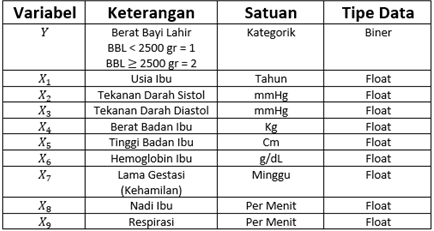

Pada project ini, variabel Nadi ibu dan respirasi tidak digunakan karena variabel tersebut tidak sesuai dengan indikator dari faktor penyebab BBLR. Maka, dilakukan data cleaning untuk menghapus variabel tersebut. 

Setelah dilakukan data cleaning, maka selanjutnya dilakukan transformasi data dengan cara dinormalisasi. 

## 4. Normalisasi Data

In [16]:
df = pd.read_excel('Data BBL.xlsx', sheet_name='Sheet4')
df

,BBL,Usia ibu,Tekanan darah sistol,Tekanan darah diastol,BB ibu,TB ibu,Hb ibu,Paritas,Lama gestasi
0,1,-0.41414,0.52995,1.08464,-0.28700,-0.73503,2.24052,-0.87534,0.44918
1,1,-0.72788,-1.09069,-0.88982,1.61495,-0.00872,-0.40576,-0.87534,-3.53766
2,1,0.84082,0.93511,1.08464,0.65446,-0.88029,0.18230,1.02757,0.98076
3,2,0.99769,1.34027,1.74279,1.04436,-0.58977,0.37832,0.07612,-0.61397
4,1,-0.25727,1.34027,1.08464,0.56887,-0.44451,-0.74880,-0.87534,0.71497
...,...,...,...,...,...,...,...,...,...
95,1,-0.88475,-0.28037,-0.23167,-0.95269,-1.75187,-0.55278,-0.87534,0.44918
96,1,-1.51223,-0.28037,-0.23167,0.47378,-0.58977,-0.35676,-0.87534,0.18339
97,2,-0.25727,0.12479,-0.23167,-0.00171,1.00813,-0.16074,0.07612,0.71497
98,1,0.68395,-0.28037,-0.23167,1.32965,0.28181,2.19151,1.02757,0.44918


## 5. Split atau Membagi data 

Tahap selanjutnya membagi data dengan menggunakan train_test_split, data dibagi menjadi dua bagian yaitu data traning dan data testing. Model klasifikasi dihasilkan dari data training dan kinerjanya dievaluasi dengan data testing. Metode ini mengambil data training secara acak dari data yang tersedia dan menyisihkan sisanya untuk digunakan sebagai data testing. 
Pada project kal ini kami menggunakan proporsi 90:10 yaitu 90% untuk data training dan 10% untuk data testing karena menghasilkan nilai akurasi tertinggi. 

Karena pembagian data dilakukan secara random, maka dilakukan beberapa kali running sampai mendapatkan nilai akurasi tertinggi. Dilakukan sebanyak 100 kali running untuk setiap proporsi. 

In [17]:
x = df[['Usia ibu','Tekanan darah sistol','Tekanan darah diastol','BB ibu','TB ibu','Hb ibu','Lama gestasi','Paritas']]
y = df['BBL']
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

Apabila sudah mendapatkan pembagian data dengan akurasi tertinggi, maka pembagian tersebut akan disimpan ke dalam excel agar data yang ada tidak ter-random lagi. Masing-masing X dan Y dipisah dalam file excel yang berbeda. 

In [18]:
#X_test = pd.DataFrame(X_test)
#X_test.to_excel("Test set.xlsx")
#X_train = pd.DataFrame(X_train)
#X_train.to_excel("Train set.xlsx")
#y_test = pd.DataFrame(y_test)
#y_test.to_excel("Test set y.xlsx")
#y_train = pd.DataFrame(y_train)
#y_train.to_excel("Train set y.xlsx")

Karena pada tahap sebelumnya hasil pembagian data dengan akurasi tertinggi telah disimpan dalam bentuk excel, maka untuk selanjutnya data yang diguakan adalah data tersebut agar nilai akurasi tidak berubah-ubah. 

In [33]:
X_train = pd.read_excel('Train set.xlsx')
X_test =  pd.read_excel('Test set.xlsx')
y_test = pd.read_excel('Test set y.xlsx')
y_train = pd.read_excel('Train set y.xlsx')

## 6. Menjalankan Algoritma PNN 

algorithms.PNN digunakan untuk menjalankan metode PNN
predict digunakan untuk menampilkan hasil prediksi dari data test sedangkan predict_proba digunakan untuk menampilkan nilai probabillitas untuk setiap kelas. 
metriks akurasi digunakan untuk menghitung akurasi dari algoritma PNN yang telah dijalankan. 

In [34]:
pnn = algorithms.PNN()
pnn.train(X_train, y_train)
hasil = pnn.predict(X_test)
hasil_prob = pnn.predict_proba(X_test)
metrics.accuracy_score(y_test,hasil)

0.8

## 7. Membuat GUI untuk Algoritma PNN
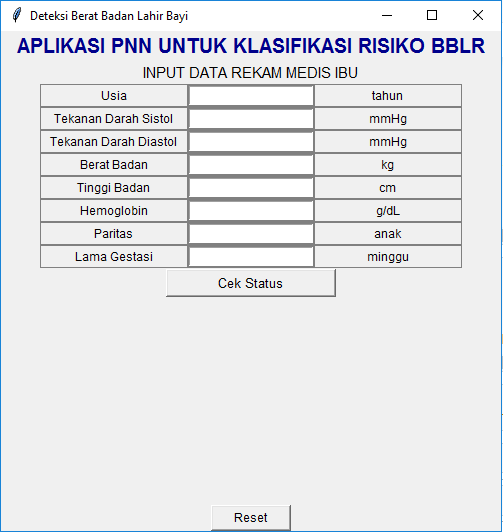

### Step 1: Install package Tkinter dan import modul di dalamnya

Tkinter (Tk Interface) adalah suatu pustaka GUI widget standar pembuatan Interface untuk Tk GUI Toolkit.

In [1]:
pip install tk

Note: you may need to restart the kernel to use updated packages.


In [2]:
from tkinter import*

### Step 2: Membuat root window

In [25]:
win = Tk()
win.geometry('500x500')
win.title('Deteksi Berat Badan Lahir Bayi')

''

### Step 3 : Mendefinisikan fungsi PNN() dan reset_entry()

In [26]:
def PNN():
    X_test = [[x1,x2,x3,x4,x5,x6,x7,x8]]
    X_train = pd.read_excel('Train set x.xlsx')
    y_train = pd.read_excel('Train set y.xlsx')
    pnn = algorithms.PNN()
    pnn.train(X_train, y_train)
    hasil = pnn.predict(X_test)
    if hasil == 1:
        result = Label(result_frame, fg = 'blue', text = "Berat Badan Lahir Normal", font = "Arial 11").grid(row=3, column=0, padx=1, pady=1)
    else:
        result = Label(result_frame, fg = 'red', text = "Berat Badan Lahir Rendah", font = "Arial 11").grid(row=3, column=0, padx=1, pady=1)
        
# membuat fungsi reset_entry()
def reset_entry():
    ent_x1.delete(0,END)
    ent_x2.delete(0,END)
    ent_x3.delete(0,END)
    ent_x4.delete(0,END)
    ent_x5.delete(0,END)
    ent_x6.delete(0,END)
    ent_x7.delete(0,END)
    ent_x8.delete(0,END)
    result.delete(0,END)

### Step 3: Menambahkan widgets ke root window

In [27]:
# membuat label judul dan keterangan
label1 = Label(win, fg = 'dark blue', text = "APLIKASI PNN UNTUK KLASIFIKASI RISIKO BBLR", font = "Arial 15 bold").pack()
label2 = Label(win, fg = 'black', text = "INPUT DATA REKAM MEDIS IBU", font = "Arial 11").pack()

In [28]:
# membuat frame untuk input data rekam medis ibu
data_frame = Frame(win, width = 500, height = 400, bg = 'grey')
data_frame.pack(side = TOP)
 
# set IntVar
x1 = IntVar(win)
x2 = IntVar(win)
x3 = IntVar(win)
x4 = IntVar(win)
x5 = IntVar(win)
x6 = IntVar(win)
x7 = IntVar(win)
x8 = IntVar(win)

# membuat baris 1
x1 = Label(data_frame, fg = 'black', text = "Usia", font = "Arial 9", width = 20).grid(row=4, column=0, padx = 1, pady = 1)
ent_x1 = Entry(data_frame, width = 20, textvariable=x1)
ent_x1.grid(row=4, column=1, padx = 1, pady = 1)
unit_x1 = Label(data_frame, fg = 'black', text = "tahun", font = "Arial 9", width = 20).grid(row=4, column=2, padx = 1, pady = 1)

# membuat baris 2
x2 = Label(data_frame, fg = 'black', text = "Tekanan Darah Sistol", font = "Arial 9", width = 20).grid(row=5, column=0, padx = 1, pady = 1)
ent_x2 = Entry(data_frame, width = 20, textvariable=x2)
ent_x2.grid(row=5, column=1, padx = 1, pady = 1)
unit_x2 = Label(data_frame, fg = 'black', text = "mmHg", font = "Arial 9", width = 20).grid(row=5, column=2, padx = 1, pady = 1)

# membuat baris 3
x3 = Label(data_frame, fg = 'black', text = "Tekanan Darah Diastol", font = "Arial 9", width = 20).grid(row=6, column=0, padx = 1, pady = 1)
ent_x3 = Entry(data_frame, width = 20, textvariable=x3)
ent_x3.grid(row=6, column=1, padx = 1, pady = 1)
unit_x3 = Label(data_frame, fg = 'black', text = "mmHg", font = "Arial 9", width = 20).grid(row=6, column=2, padx = 1, pady = 1)

# membuat baris 4
x4 = Label(data_frame, fg = 'black', text = "Berat Badan", font = "Arial 9", width = 20).grid(row=7, column=0, padx = 1, pady = 1)
ent_x4 = Entry(data_frame, width = 20, textvariable=x4)
ent_x4.grid(row=7, column=1, padx = 1, pady = 1)
unit_x4 = Label(data_frame, fg = 'black', text = "kg", font = "Arial 9", width = 20).grid(row=7, column=2, padx = 1, pady = 1)

# membuat baris 5
x5 = Label(data_frame, fg = 'black', text = "Tinggi Badan", font = "Arial 9", width = 20).grid(row=8, column=0, padx = 1, pady = 1)
ent_x5 = Entry(data_frame, width = 20, textvariable=x5)
ent_x5.grid(row=8, column=1, padx = 1, pady = 1)
unit_x5 = Label(data_frame, fg = 'black', text = "cm", font = "Arial 9", width = 20).grid(row=8, column=2, padx = 1, pady = 1)

# membuat baris 6
x6 = Label(data_frame, fg = 'black', text = "Hemoglobin", font = "Arial 9", width = 20).grid(row=9, column=0, padx = 1, pady = 1)
ent_x6 = Entry(data_frame, width = 20, textvariable=x6)
ent_x6.grid(row=9, column=1, padx = 1, pady = 1)
unit_x6 = Label(data_frame, fg = 'black', text = "g/dL", font = "Arial 9", width = 20).grid(row=9, column=2, padx = 1, pady = 1)

# membuat baris 7
x7 = Label(data_frame, fg = 'black', text = "Paritas", font = "Arial 9", width = 20).grid(row=10, column=0, padx = 1, pady = 1)
ent_x7 = Entry(data_frame, width = 20, textvariable=x7)
ent_x7.grid(row=10, column=1, padx = 1, pady = 1)
unit_x7 = Label(data_frame, fg = 'black', text = "anak", font = "Arial 9", width = 20).grid(row=10, column=2, padx = 1, pady = 1)


# membuat baris 8
x8 = Label(data_frame, fg = 'black', text = "Lama Gestasi", font = "Arial 9", width = 20).grid(row=11, column=0, padx = 1, pady = 1)
ent_x8 = Entry(data_frame, width = 20, textvariable=x8)
ent_x8.grid(row=11, column=1, padx = 1, pady = 1)
unit_x8 = Label(data_frame, fg = 'black', text = "minggu", font = "Arial 9", width = 20).grid(row=11, column=2, padx = 1, pady = 1)

In [29]:
# membuat frame untuk button hasil klasifikasi
result_frame = Frame(win, width = 500, height = 100)
result_frame.pack(side = TOP)

button1 = Button (result_frame, fg = 'black', text = 'Cek Status', font = 'Arial 10', width = 20, command = PNN).grid(row=0, column=0, padx=1, pady=1)

In [30]:
# membuat tombol reset
button2 = Button (win, fg = 'black', text = 'Reset', font = 'Arial 9', width = 10, command = reset_entry).pack(side = BOTTOM)

In [31]:
win.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dik\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "<ipython-input-26-9cb6ff6e0007>", line 23, in reset_entry
    result.delete(0,END)
NameError: name 'result' is not defined
